In [2]:
from keras.models import load_model
import cv2

Using TensorFlow backend.


### load the trained model

In [3]:
model = load_model("model_fmd")






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### provide the path of the image in the cell below

In [5]:
image = cv2.imread('t13.jpg')

converting the image into gray scale

In [6]:
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray.shape

(168, 300)

Since we know that the opencv load the image in RGB format so we defined a function in the cell below which convert a BGR image to RGB image

In [7]:
def convert_to_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### Haar Cascades Files

In [8]:
haar_cascade_face = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

In [9]:
faces = haar_cascade_face.detectMultiScale(gray,scaleFactor = 1.2, minNeighbors = 1)
print("faces found",len(faces))

faces found 3


In [10]:
labels_dict={0:'NO_MASK',1:'MASK'}   # defing labels
color_dict={0:(0,0,255),1:(0,255,0)} #providing labe

for (x,y,w,h) in faces:
    
    face_img=gray[y:y+w,x:x+w]
    resized=cv2.resize(face_img,(100,100))
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,100,100,1))
    
    
    result=model.predict(reshaped)
    label=np.argmax(result,axis=1)[0]
    
    cv2.rectangle(image,(x,y),(x+w,y+h),color_dict[label],2)
    cv2.rectangle(image,(x,y-40),(x+w,y),color_dict[label],-1)
    cv2.putText(image, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.45,(255,255,255),2)

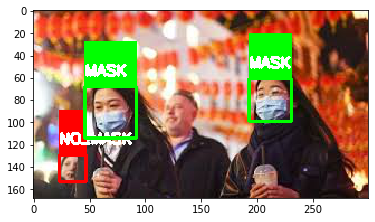

In [11]:
plt.imshow(convert_to_rgb(image))